In [1]:
library(anomalize)
library(xts)
library(zoo)
library(quantmod)
library(TTR)
library(tidyverse)
library(dplyr)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::first()  masks xts::first()
x dplyr::lag()    masks stats::lag()
x dplyr::last()   masks xts::last()


In [2]:
getSymbols("ADP", src = 'yahoo')

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "ADP"

In [3]:
df <- ADP
class(df)

[1] "xts" "zoo"

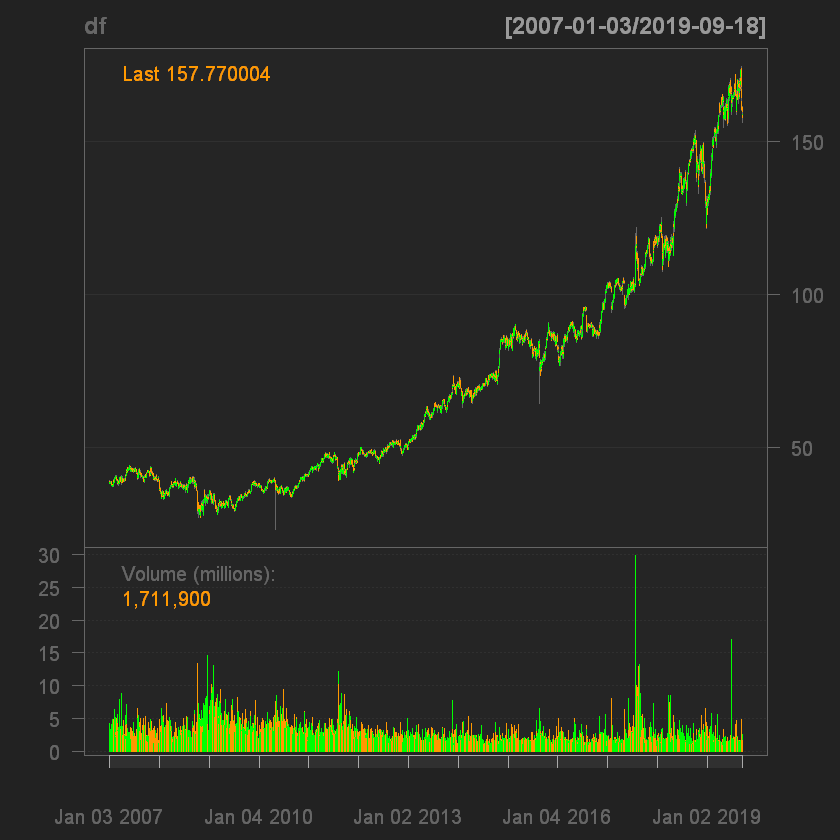

In [4]:
#first look at the data, 
chartSeries(df)

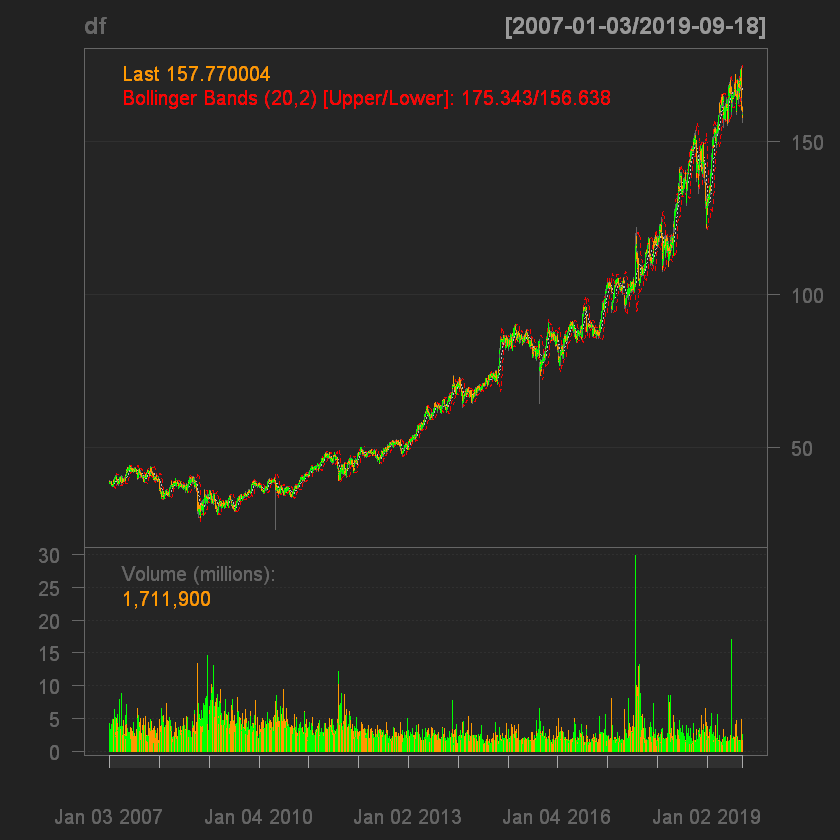

In [5]:
chartSeries(df, TA = c(addVo(),addBBands()))

I wanted to focus on the current year to see if there has been an indentifiable trend occuring in the stock price, because as I saw in the first visual I created there seemed to be an upward trend. I noticed that there were some sharp changes in the stock price that weren't necessarily reflected in the volume of the stock so these were two areas I wanted to further investigate to determine what sprung these changes in the price.

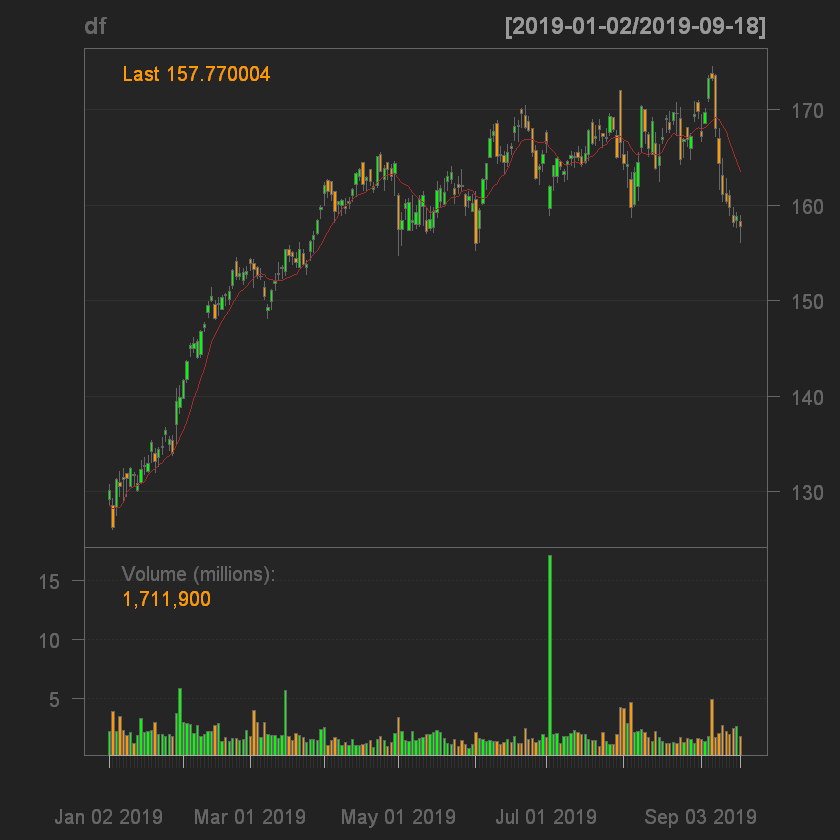

In [6]:
#Used this visual to display the volume and the simple moving avg (SMA)
#resources https://www.quantmod.com/examples/charting/
chartSeries(df, subset = '2019-01::2019-09', TA = c(addVo(), addSMA()))

In [8]:
#looking at last 6months
chartSeries(df, subset = '2019-03::2007-09', TA = c(addVo(), addBBands()))

Warning message in periodicity(x):
"can not calculate periodicity of empty object"Warning message in periodicity(x):
"can not calculate periodicity of empty object"

ERROR: Error in prettyNum(.Internal(format(x, trim, digits, nsmall, width, 3L, : invalid 'trim' argument


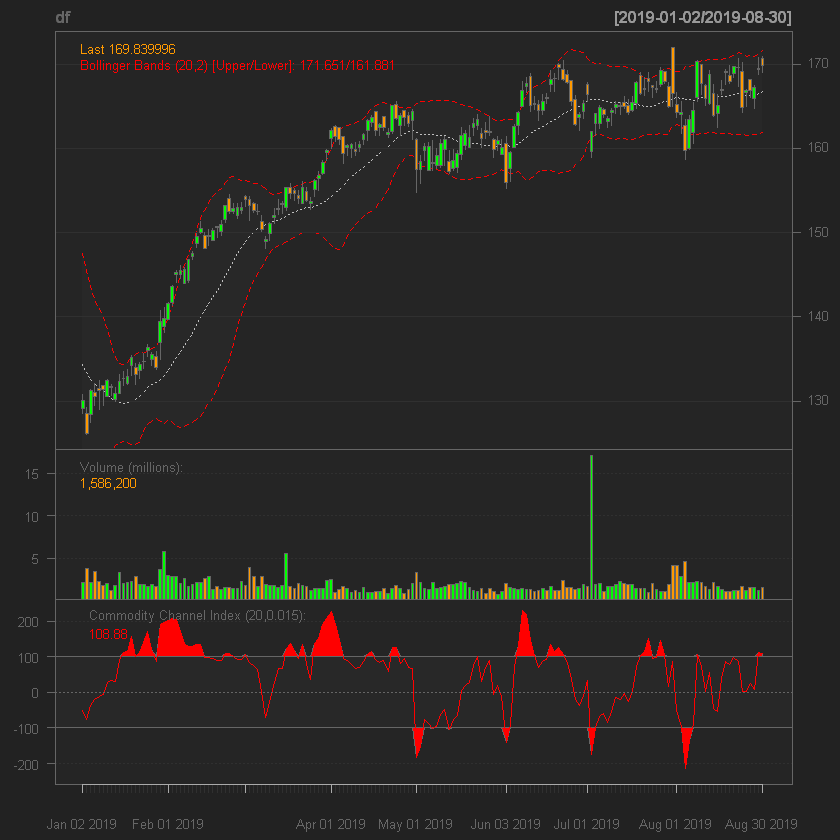

In [9]:
chartSeries(df, subset = "2019::2019-08",  TA="addVo();addBBands();addCCI()")

commodity channel index is a momentum based tool that indicates when an investment is being oversold/overbought and can indicate the price direction and strength (source:https://www.investopedia.com/terms/c/commoditychannelindex.asp)

So I chose to include it in my view here to help explain why I was seeing bigger increases in the stock price but not a comparable change in the volume of the stock. 

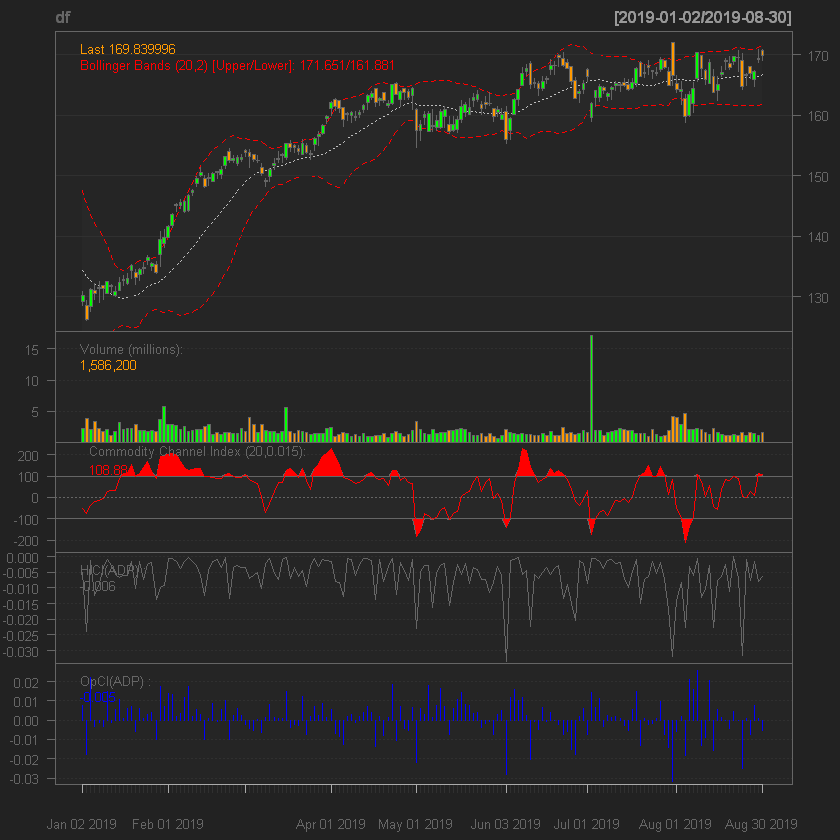

In [10]:
chartSeries(df, subset = "2019::2019-08",  
            TA="addVo();addBBands();addCCI();addTA(HiCl(ADP)); 
                addTA(OpCl(ADP),col='blue', type='h') ")

In [11]:
df2 <- df

In [13]:
head(df)

           ADP.Open ADP.High  ADP.Low ADP.Close ADP.Volume ADP.Adjusted
2007-01-03 38.62222 39.08220 38.21776  38.39223    3311800     27.57758
2007-01-04 38.30500 38.86014 38.30500  38.78083    4334500     27.85672
2007-01-05 38.78083 38.83635 38.55878  38.66980    1935500     27.77696
2007-01-08 38.55085 38.83635 38.43189  38.69360    2745300     27.79405
2007-01-09 38.66187 38.92358 38.28120  38.54292    1772000     27.68581
2007-01-10 38.51119 38.55085 38.17810  38.32879    2414200     27.53200

In [12]:
df2$OpCl <- OpCl(df2)
df2$OpOp <- OpOp(df2)
df2$HiCl <- HiCl(df2)
head(df2)

           ADP.Open ADP.High  ADP.Low ADP.Close ADP.Volume ADP.Adjusted
2007-01-03 38.62222 39.08220 38.21776  38.39223    3311800     27.57758
2007-01-04 38.30500 38.86014 38.30500  38.78083    4334500     27.85672
2007-01-05 38.78083 38.83635 38.55878  38.66980    1935500     27.77696
2007-01-08 38.55085 38.83635 38.43189  38.69360    2745300     27.79405
2007-01-09 38.66187 38.92358 38.28120  38.54292    1772000     27.68581
2007-01-10 38.51119 38.55085 38.17810  38.32879    2414200     27.53200
                   OpCl         OpOp         HiCl
2007-01-03 -0.005954914           NA -0.017654278
2007-01-04  0.012422348 -0.008213587 -0.002040857
2007-01-05 -0.002863012  0.012422348 -0.004288379
2007-01-08  0.003702902 -0.005930455 -0.003675757
2007-01-09 -0.003076881  0.002880015 -0.009779906
2007-01-10 -0.004736363 -0.003897406 -0.005760107

In [14]:
df2$lagCl <- Lag(Cl(df2))
head(df2)

           ADP.Open ADP.High  ADP.Low ADP.Close ADP.Volume ADP.Adjusted
2007-01-03 38.62222 39.08220 38.21776  38.39223    3311800     27.57758
2007-01-04 38.30500 38.86014 38.30500  38.78083    4334500     27.85672
2007-01-05 38.78083 38.83635 38.55878  38.66980    1935500     27.77696
2007-01-08 38.55085 38.83635 38.43189  38.69360    2745300     27.79405
2007-01-09 38.66187 38.92358 38.28120  38.54292    1772000     27.68581
2007-01-10 38.51119 38.55085 38.17810  38.32879    2414200     27.53200
                   OpCl         OpOp         HiCl    lagCl
2007-01-03 -0.005954914           NA -0.017654278       NA
2007-01-04  0.012422348 -0.008213587 -0.002040857 38.39223
2007-01-05 -0.002863012  0.012422348 -0.004288379 38.78083
2007-01-08  0.003702902 -0.005930455 -0.003675757 38.66980
2007-01-09 -0.003076881  0.002880015 -0.009779906 38.69360
2007-01-10 -0.004736363 -0.003897406 -0.005760107 38.54292

In [16]:
#creating lag periods
lag_periods <- Lag(Cl(df2),c(2,3,4,5))
colnames(lag_periods) <-c("lag2CL", "lag3Cl", "lag4CL", "lag5Cl")
df2 <- cbind(df2,lag_periods)
head(df2)

           ADP.Open ADP.High  ADP.Low ADP.Close ADP.Volume ADP.Adjusted
2007-01-03 38.62222 39.08220 38.21776  38.39223    3311800     27.57758
2007-01-04 38.30500 38.86014 38.30500  38.78083    4334500     27.85672
2007-01-05 38.78083 38.83635 38.55878  38.66980    1935500     27.77696
2007-01-08 38.55085 38.83635 38.43189  38.69360    2745300     27.79405
2007-01-09 38.66187 38.92358 38.28120  38.54292    1772000     27.68581
2007-01-10 38.51119 38.55085 38.17810  38.32879    2414200     27.53200
                   OpCl         OpOp         HiCl    lagCl   lag2CL   lag3Cl
2007-01-03 -0.005954914           NA -0.017654278       NA       NA       NA
2007-01-04  0.012422348 -0.008213587 -0.002040857 38.39223       NA       NA
2007-01-05 -0.002863012  0.012422348 -0.004288379 38.78083 38.39223       NA
2007-01-08  0.003702902 -0.005930455 -0.003675757 38.66980 38.78083 38.39223
2007-01-09 -0.003076881  0.002880015 -0.009779906 38.69360 38.66980 38.78083
2007-01-10 -0.004736363 -0.0038974

In [18]:
lag_periods <- Next(OpCl(df2)) #The next periods open to close - today! 
colnames(lag_periods) <-c("nextOpCl")
df2 <- cbind(df2,lag_periods)
head(df2)

ADP.Open,ADP.High,ADP.Low,ADP.Close,ADP.Volume,ADP.Adjusted,OpCl,OpOp,HiCl,lagCl,lag2CL,lag3Cl,lag4CL,lag5Cl,nextOpCl
38.62222,39.08220,38.21776,38.39223,3311800,27.57758,-0.005954914,NA,-0.017654278,NA,NA,NA,NA,NA,0.012422348
38.30500,38.86014,38.30500,38.78083,4334500,27.85672,0.012422348,-0.008213587,-0.002040857,38.39223,NA,NA,NA,NA,-0.002863012
38.78083,38.83635,38.55878,38.66980,1935500,27.77696,-0.002863012,0.012422348,-0.004288379,38.78083,38.39223,NA,NA,NA,0.003702902
38.55085,38.83635,38.43189,38.69360,2745300,27.79405,0.003702902,-0.005930455,-0.003675757,38.66980,38.78083,38.39223,NA,NA,-0.003076881
38.66187,38.92358,38.28120,38.54292,1772000,27.68581,-0.003076881,0.002880015,-0.009779906,38.69360,38.66980,38.78083,38.39223,NA,-0.004736363
38.51119,38.55085,38.17810,38.32879,2414200,27.53200,-0.004736363,-0.003897406,-0.005760107,38.54292,38.69360,38.66980,38.78083,38.39223,0.001656364


Look up the function "Next" function to provide answer for why you used the function:



### Converting time period from daily to monthly

In [19]:
df.monthly <- to.monthly(df)
head(df.monthly)

          df.Open  df.High   df.Low df.Close df.Volume df.Adjusted
Jan 2007 38.62222 39.08220 37.15505 37.84502  62661000    27.18451
Feb 2007 38.30500 40.84280 38.18603 39.45494  62967700    28.34094
Mar 2007 39.05841 40.35110 37.71020 38.38430  75112100    27.70245
Apr 2007 38.71817 40.97454 38.53380 39.29763  66978100    28.36161
May 2007 40.07902 43.80158 39.75417 43.63477  64921500    31.49177
Jun 2007 43.63477 44.16154 41.87884 42.55487  56973500    30.86013

In [20]:
rtn.daily <- dailyReturn(df) # returns by day 
rtn.weekly <- weeklyReturn(df) # returns by week 
rtn.monthly <- monthlyReturn(df) # returns by month, indexed by yearmon 
# daily,weekly,monthly,quarterly, and yearly 
rtn.allperiods <- allReturns(df) # note the plural

# Volume

In [21]:
df$month <- format(index(df),"%Y%m")
df$year <- format(index(df),"%Y")
head(df)

           ADP.Open ADP.High  ADP.Low ADP.Close ADP.Volume ADP.Adjusted  month
2007-01-03 38.62222 39.08220 38.21776  38.39223    3311800     27.57758 200701
2007-01-04 38.30500 38.86014 38.30500  38.78083    4334500     27.85672 200701
2007-01-05 38.78083 38.83635 38.55878  38.66980    1935500     27.77696 200701
2007-01-08 38.55085 38.83635 38.43189  38.69360    2745300     27.79405 200701
2007-01-09 38.66187 38.92358 38.28120  38.54292    1772000     27.68581 200701
2007-01-10 38.51119 38.55085 38.17810  38.32879    2414200     27.53200 200701
           year
2007-01-03 2007
2007-01-04 2007
2007-01-05 2007
2007-01-08 2007
2007-01-09 2007
2007-01-10 2007

In [22]:
df2 <- as.data.frame(df)
head(df2)

,ADP.Open,ADP.High,ADP.Low,ADP.Close,ADP.Volume,ADP.Adjusted,month,year
2007-01-03,38.62222,39.08220,38.21776,38.39223,3311800,27.57758,200701,2007
2007-01-04,38.30500,38.86014,38.30500,38.78083,4334500,27.85672,200701,2007
2007-01-05,38.78083,38.83635,38.55878,38.66980,1935500,27.77696,200701,2007
2007-01-08,38.55085,38.83635,38.43189,38.69360,2745300,27.79405,200701,2007
2007-01-09,38.66187,38.92358,38.28120,38.54292,1772000,27.68581,200701,2007
2007-01-10,38.51119,38.55085,38.17810,38.32879,2414200,27.53200,200701,2007


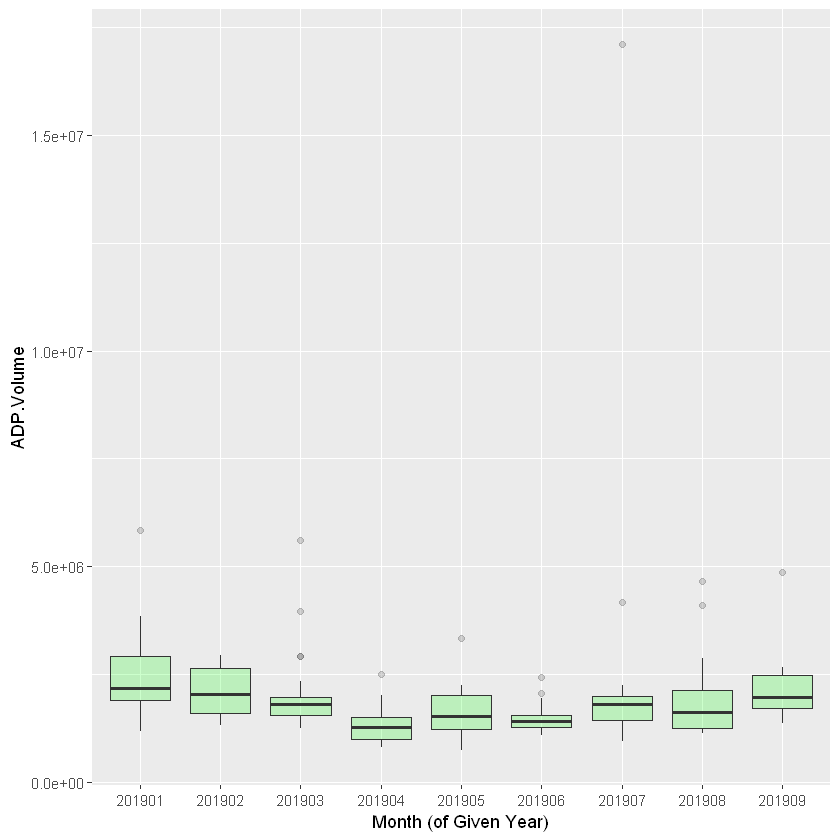

In [23]:
df3 <- df2 %>% filter(year==2019)
df3$ADP.Volume <- as.numeric(df3$ADP.Volume)
box_plot <- ggplot(df3, aes(x=as.factor(month), y=ADP.Volume))
box_plot + geom_boxplot(fill="green", alpha=0.2) + xlab("Month (of Given Year)")